#### import libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import os,joblib,missingno

#sklearn
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline ,FeatureUnion
## sklearn -- Models
from sklearn_features.transformers import DataFrameSelector 
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge, Lasso, ElasticNet

## sklearn -- Metric
from sklearn.metrics import r2_score,mean_squared_error
#knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBRegressor

In [2]:
os.getcwd()

'C:\\Users\\Kimo Store'

In [3]:
FILE_PATH=os.path.join(os.getcwd(),'housing.csv')

In [4]:
df_housing=pd.read_csv(FILE_PATH)
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

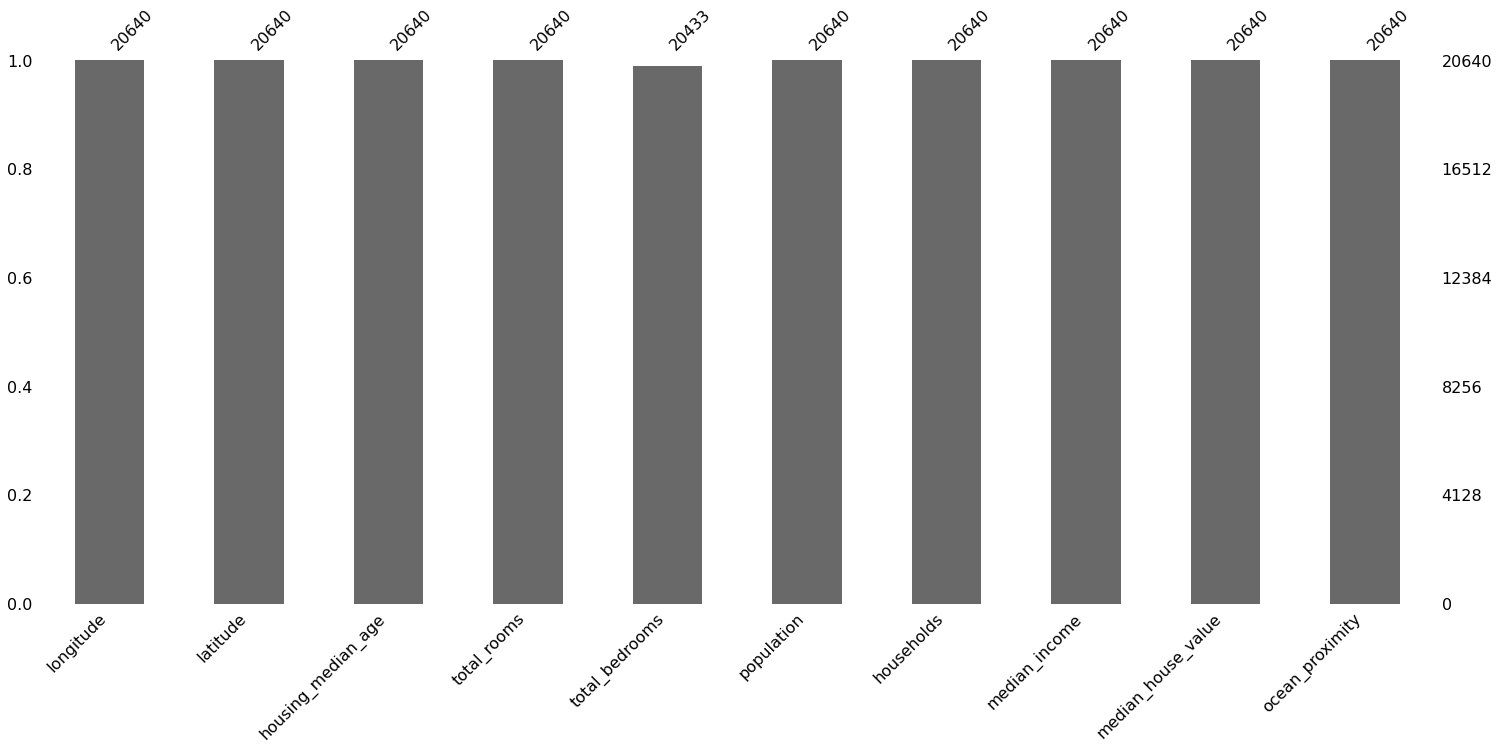

In [8]:
#missingno library
missingno.bar(df_housing)

<AxesSubplot:>

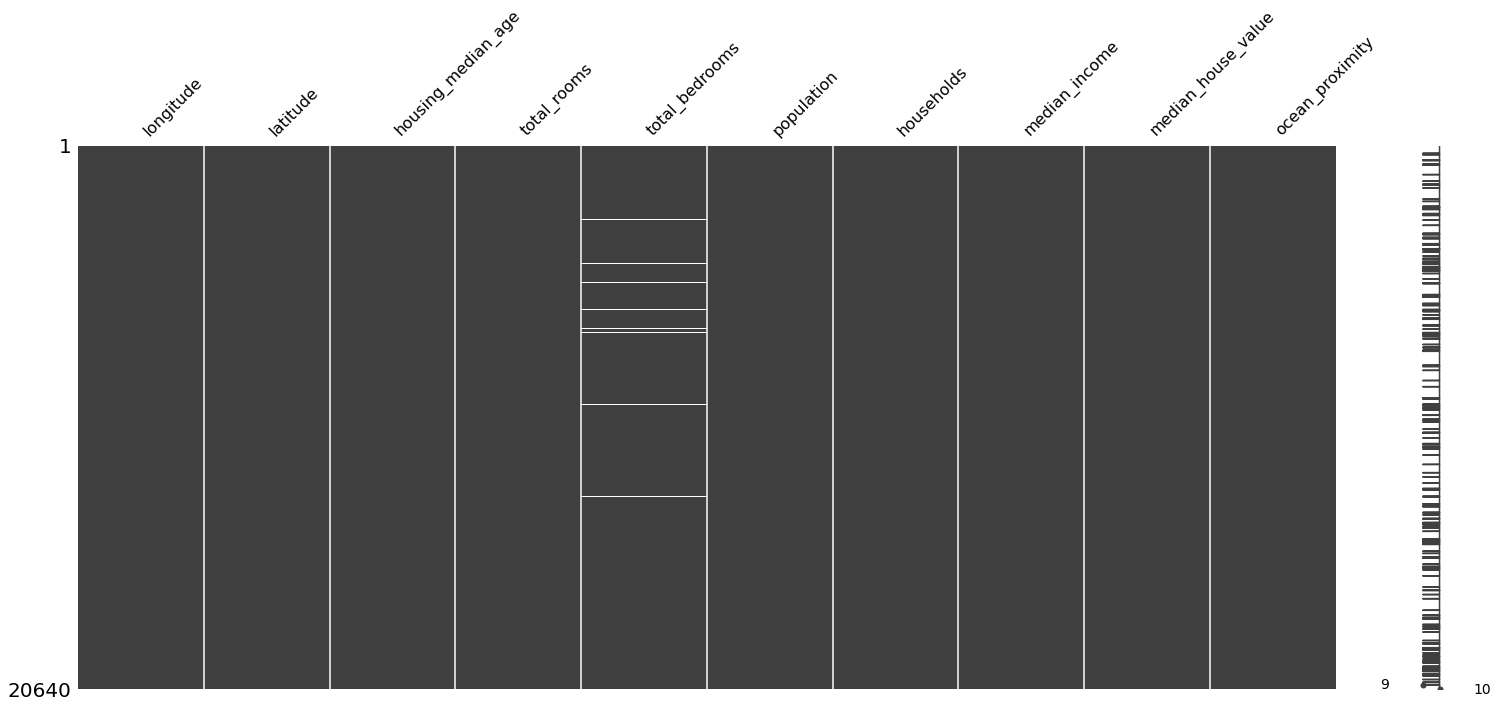

In [9]:
#gives us nulls positions in columns

missingno.matrix(df_housing)

the data has no missing values except for no of bedrooms (207) and all data types are float 64 except for ocean_proximity is object

# Explatory Data Analysis
# univariate

In [10]:
ocean_values = df_housing['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)


categories of (ocean_proximity) --- 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


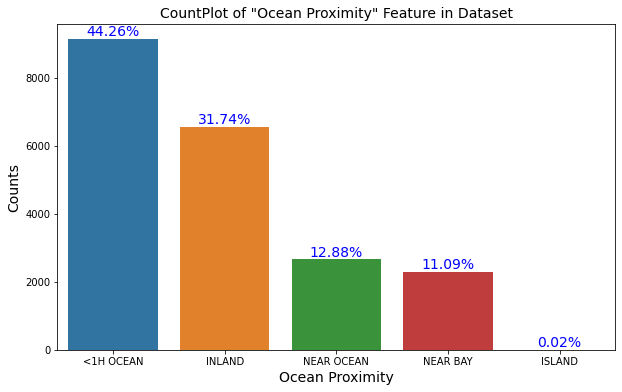

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(df_housing)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')


In [12]:
#removing the "<" before 1H ocean
df_housing['ocean_proximity']= df_housing['ocean_proximity'].replace("<1H OCEAN","1H OCEAN")
#or df_housing['ocean_proximity'].replace("<1H OCEAN","1H OCEAN",,inplace=True) 
df_housing['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

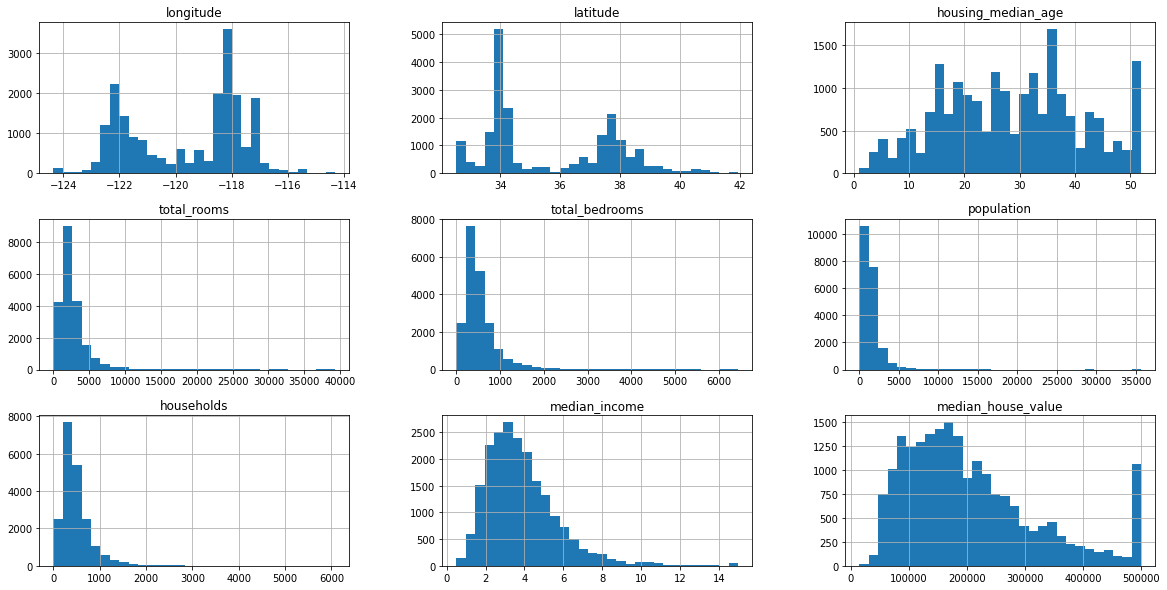

In [13]:
#histogram distrubtion of numerical features
df_housing.hist(bins=30,figsize=[20,10])
plt.show()

E:\anaconda\envs\RegPro\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


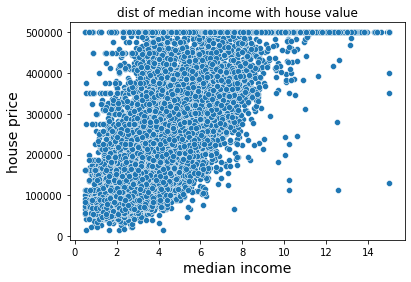

In [14]:
#scatter plot of median_house
sns.scatterplot(df_housing['median_income'],df_housing['median_house_value'])
plt.title("dist of median income with house value")
plt.xlabel("median income",fontsize=14,c='k')
plt.ylabel("house price",fontsize=14,c='k')

plt.show()

In [15]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [16]:
house_value_bins=pd.cut(df_housing['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
      labels=['0-100k','100-200k','300-400k','400-500k','500-600k','>600k'])

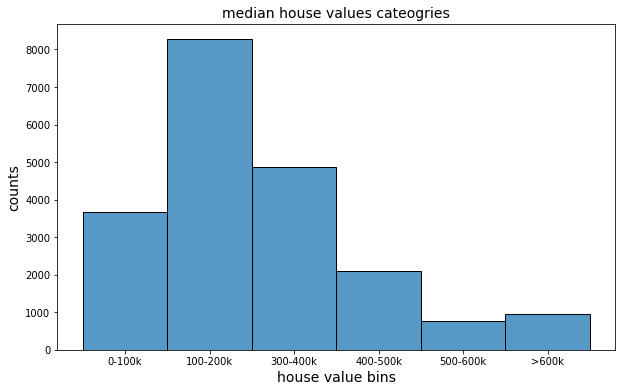

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(house_value_bins)
plt.title("median house values cateogries",fontsize=14)
plt.xlabel("house value bins",fontsize=14)
plt.ylabel("counts",fontsize=14)
plt.show()

In [18]:
df_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [19]:


median_income_bins = pd.cut(df_housing['median_income'],bins=[-np.inf,1.5,3,4.5,6,np.inf],
      labels=['0-1.5','1.5-3','3-4.5','4.5-6','6<'])

Text(0, 0.5, 'counts')

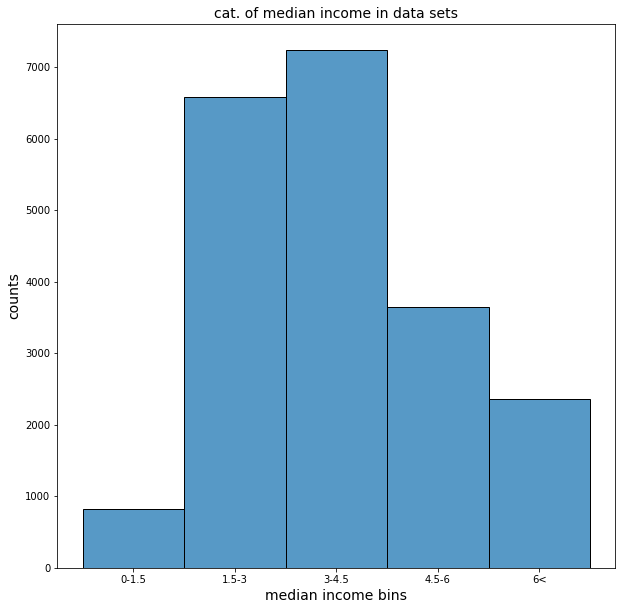

In [20]:
plt.figure(figsize=[10,10])
sns.histplot(median_income_bins)
plt.title("cat. of median income in data sets",fontsize=14)
plt.xlabel("median income bins",fontsize=14)
plt.ylabel("counts",fontsize=14)


# bivariate visualization

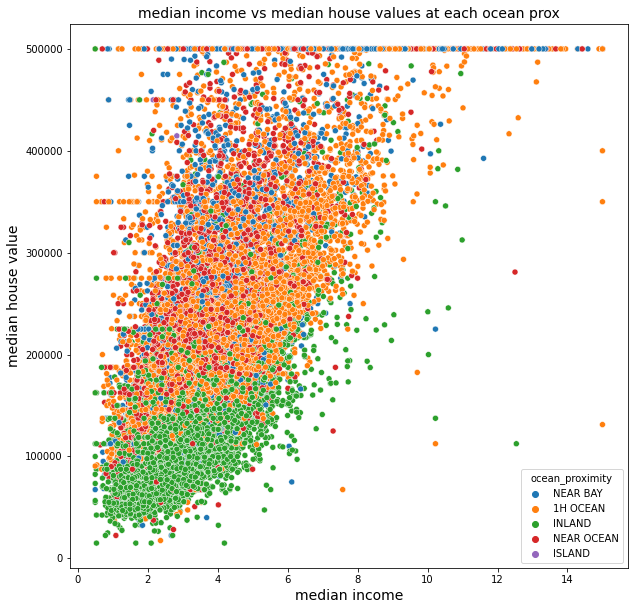

In [21]:
#scatter plot between median income , median house value at ocean approx
plt.figure(figsize=[10,10])
sns.scatterplot(x=df_housing['median_income'],y=df_housing['median_house_value'],hue=df_housing['ocean_proximity'])
plt.title("median income vs median house values at each ocean prox",fontsize=14)
plt.xlabel("median income",fontsize = 14)
plt.ylabel("median house value",fontsize=14)
plt.show()

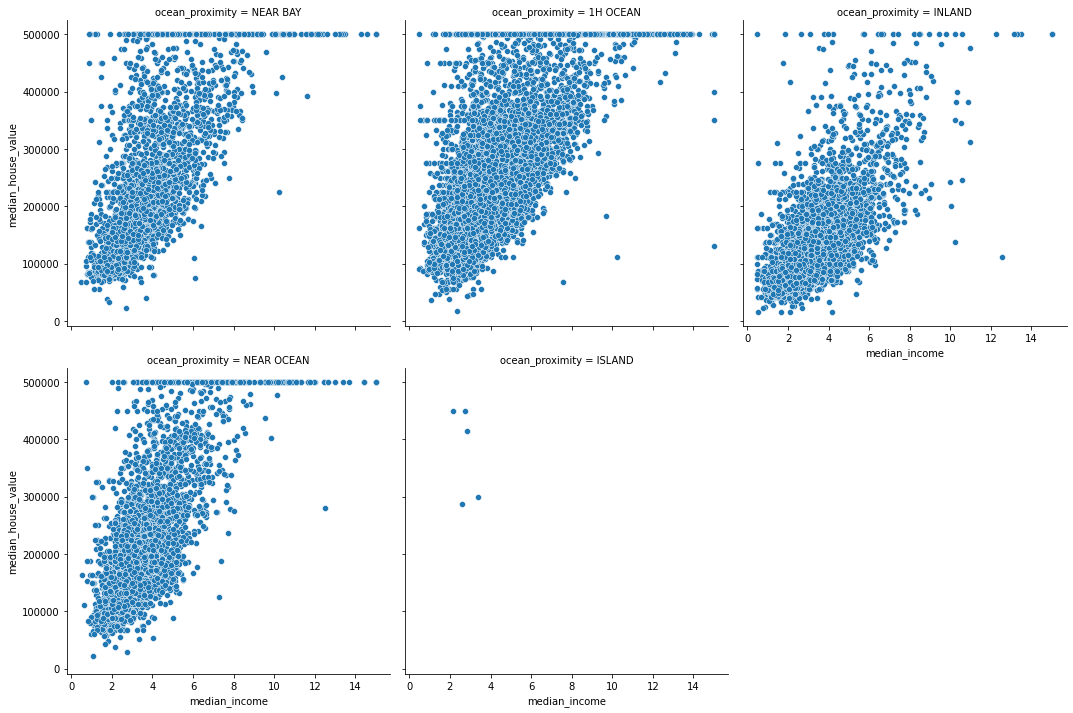

In [22]:
#Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter', col='ocean_proximity', col_wrap=3)

plt.show()

#we see that at different ocean proximity the data is nearly the same except for ocean='island'

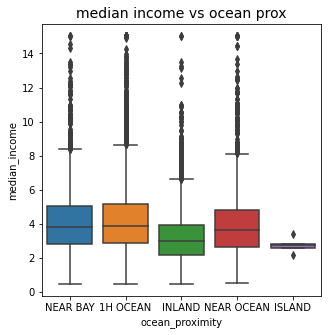

In [23]:
#check boxplot of median income with ocean prox
plt.figure(figsize=(5,5))
sns.boxplot(x=df_housing['ocean_proximity'],y=df_housing['median_income'])
plt.title("median income vs ocean prox",fontsize=14)
plt.show()

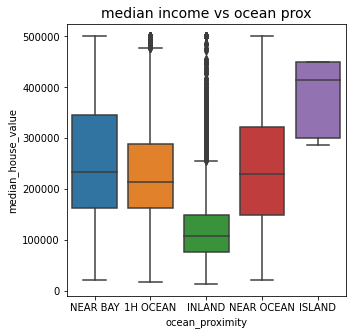

In [24]:
#check boxplot of median income with ocean prox
plt.figure(figsize=(5,5))
sns.boxplot(x=df_housing['ocean_proximity'],y=df_housing['median_house_value'])
plt.title("median income vs ocean prox",fontsize=14)
plt.show()

It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense

# Multivariate

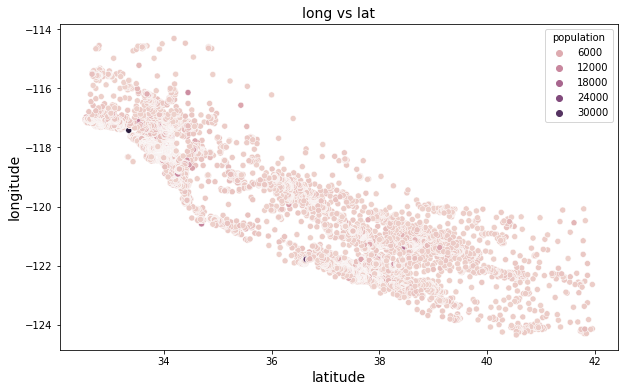

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_housing['latitude'],y=df_housing['longitude'],hue=df_housing['population']
               ,c=df_housing['median_house_value'],cmap=plt.get_cmap('jet'))
plt.title("long vs lat",fontsize=14)
plt.xlabel("latitude",fontsize=14)
plt.ylabel("longitude",fontsize=14)
plt.show()

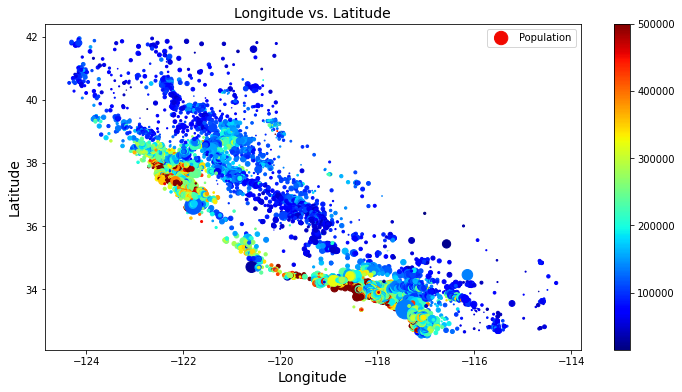

In [26]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], 
                 s=df_housing['population']/100, c=df_housing['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

# Check the Correlation between the Features and Target

In [27]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

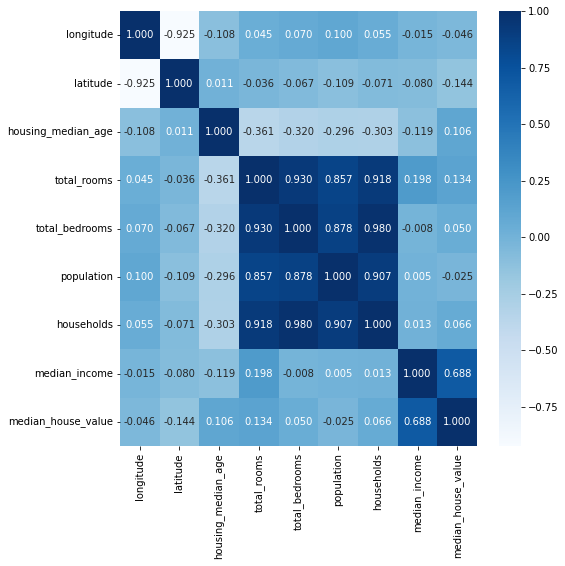

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(df_housing.corr(),annot=True,cmap='Blues',fmt='.3f')
plt.show()

the most correlated feature with the target(median house values) is median income , however features like population and households is less correlated

# Feature Engineering

In [29]:
#try to make new feature --. feature extraction
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [30]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

we found that the 2 new features are more correlated than the original features bedroms_per_rooms ,rooms_per_household

# spilit the data set

In [31]:
#dropping the column so axis is = 1
X = df_housing.drop(columns='median_house_value',axis=1)
y = df_housing['median_house_value']

In [32]:
X.shape

(20640, 12)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.15,random_state=42)
# check the split method
print(f'xtrain shape is {X_train.shape}')
print(f'xtest shape is {X_test.shape}')
print(f'ytrain shape is {y_train.shape}')
print(f'ytest shape is {y_test.shape}')

xtrain shape is (17544, 12)
xtest shape is (3096, 12)
ytrain shape is (17544,)
ytest shape is (3096,)


# dealing with nulls

In [34]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes in ['int','int64','float64','float32']]
categ_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categ_cols

['ocean_proximity']

In [35]:
df_housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedroms_per_rooms           207
population_per_household      0
dtype: int64

In [36]:
#imputing the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[num_cols]) #the imputer learn the median of each feature

#imputer.fit_transform(X_train[num_cols]) #same as fit then transform

#transform did what imputer learn
X_train_filled = imputer.transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

In [37]:
imputer.statistics_ #the imputer learn the median of each feature

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        5.23456397e+00,  2.02876796e-01,  2.81793691e+00])

In [38]:
X_train[num_cols].median() #same as returned from statistics_

longitude                   -118.510000
latitude                      34.265000
housing_median_age            29.000000
total_rooms                 2131.000000
total_bedrooms               437.000000
population                  1168.000000
households                   410.500000
median_income                  3.540900
rooms_per_household            5.234564
bedroms_per_rooms              0.202877
population_per_household       2.817937
dtype: float64

In [39]:
pd.DataFrame(X_train_filled).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

# standradization

In [40]:
#z_score normalization
scaler = StandardScaler()
#learn from train data using fit method
scaler.fit(X_train_filled)
#
X_train_scaled = scaler.transform(X_train_filled)
X_test_scaled =scaler.transform(X_test_filled)

# pipeline for numerical features 


In [41]:
#building a pipeline for a numerical features
num_pipeline = Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='median')),
                        ('scaler',StandardScaler())
                    ])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train[num_cols])  ## train
X_test_num = num_pipeline.transform(X_test[num_cols])  ## test

# Categorical Features 

Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding

Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column
Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...
OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned

In [42]:
np.unique(X_train[categ_cols])

array(['1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [43]:
lbl_encoder = LabelEncoder()
#X_train_encoded = lbl_encoder.fit_transform(X_train[categ_cols]) #must be 1D array so we use np.squeeze
X_train_encoded = lbl_encoder.fit_transform(np.squeeze(X_train[categ_cols].values))
X_test_encoded =lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))

In [44]:
X_train_encoded

array([0, 0, 1, ..., 0, 0, 3])

# categorical pipeline

Use OHE -> it is preferable to use OHE when encoding for Features, But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target

In [45]:
categ_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('OHE',OneHotEncoder(sparse=False))
])
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])

In [46]:
X_train_categ 

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# putting the two pipelines together 


In [47]:
num_pipeline = Pipeline(steps=[
                        ('selector',DataFrameSelector(num_cols)),
                        ('imputer',SimpleImputer(strategy='median')),
                        ('scaler',StandardScaler())
                    ])

categ_pipeline = Pipeline(steps=[
                        ('selector',DataFrameSelector(categ_cols)),
                        ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                        ('OHE',OneHotEncoder(sparse=False))
                    ])

total_pipeline = FeatureUnion(transformer_list=[
                        ('num_pipe',num_pipeline),
                        ('cat_pipe',categ_pipeline)
                    ])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)  

In [48]:
X_train_final.shape , X_test_final.shape

((17544, 16), (3096, 16))

In [49]:
y_train.shape,y_test.shape

((17544,), (3096,))

if i have new data like x_new = x_test.iloc[500:100]

must go for the same preprocessing 

x_new_final = total_pipeline.transform(x_new)

# Model building
linear regression

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [51]:
lin_reg.coef_,lin_reg.intercept_
#return 16 weight = no of features + bias 

(array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
          8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
          6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
        -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772]),
 239967.5707416455)

In [52]:
rmse_scores_lin = cross_val_score(estimator=lin_reg,X=X_train_final,y=y_train,cv=5
                                  ,n_jobs=4,scoring='neg_mean_squared_error')
rmse_scores_lin = -1 * rmse_scores_lin
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f"RMSE using Linear Regression is {np.round(rmse_scores_lin,4)}")
print(f"mean of RMSE using Linear Regression is {rmse_scores_lin.mean():.4f}")


RMSE using Linear Regression is [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
mean of RMSE using Linear Regression is 67880.1426


In [53]:
#get prediction using cross validation
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=4)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train,y_pred_lin))
rmse_pred_lin

67898.88872785706

the mean out of cross validation score is nearly equal to the mean sqaured error manually

# 2.SGDRegressor

In [54]:
sgd_reg= SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)
sgd_reg.fit(X_train_final,y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [55]:
rmse_scores_sgd = cross_val_score(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,
                                 n_jobs=4,scoring='neg_mean_squared_error')
rmse_scores_sgd = -1 * rmse_scores_sgd
rmse_scores_sgd = np.sqrt(rmse_scores_sgd)
print(f"RMSE using SGDRegressor is {np.round(rmse_scores_sgd,4)}")
print(f"mean of RMSE using SGDRegressor is {rmse_scores_sgd.mean():.4f}")


RMSE using SGDRegressor is [66703.4092 69253.1257 66584.7916 67108.3716 70366.3555]
mean of RMSE using SGDRegressor is 68003.2107


In [56]:
y_pred_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train,
                               cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_sgd = np.sqrt(mean_squared_error(y_train, y_pred_sgd))
print(f'RMSE after prediction Using SGDRegressor --- {rmse_pred_sgd:.4f}') 

RMSE after prediction Using SGDRegressor --- 68012.5425


# 3-Ridge

In [57]:
#regularized version of linear regression
#Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)

ridge_reg = Ridge(alpha=0.9,solver='cholesky')
ridge_reg.fit(X_train_final,y_train)


Ridge(alpha=0.9, solver='cholesky')

In [58]:
rmse_scores_ridge = cross_val_score(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,
                                 n_jobs=4,scoring='neg_mean_squared_error')
rmse_scores_ridge = -1 *rmse_scores_ridge
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f"RMSE using Ridge is {np.round(rmse_scores_ridge,4)}")
print(f"mean of RMSE using Ridge is {rmse_scores_ridge.mean():.4f}")

RMSE using Ridge is [66661.9092 69280.0422 66609.0479 67082.7736 70354.5492]
mean of RMSE using Ridge is 67997.6644


In [59]:
y_pred_ridge= cross_val_predict(estimator=sgd_reg,X=X_train_final,y=y_train,cv=5,
                                 n_jobs=4,method='predict')
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train,y_pred_ridge))
rmse_pred_ridge

68017.60577018002

# 4-Lasso

In [60]:
## Define Lasso Model (Regularized Version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [61]:
lasso_reg.coef_,lasso_reg.intercept_


(array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
          8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
          6350.89510096,  16578.08308073,    700.82893968,      0.        ,
        -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083]),
 217919.01021630166)

when running the Lasso model it gives us the weights of features and some weights has zero it has no importance which heps us in feature selelction

# 5-ElasticNet

In [62]:
## Define ElasticNet Model (Regularized Version of LinearRegression)
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X_train_final, y_train)  ## train the model   and try p


ElasticNet(alpha=0.1)

# 6- plynomial Regression

In [63]:
X_train_final.shape

(17544, 16)

In [64]:
poly_feat = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_feat.fit_transform(X_train_final)
X_poly.shape

(17544, 152)

(no of features + degree)! / n! d! including the bias 
if include_bais = false ----> subtract 1 from the equation

In [65]:
#fit polynomial regression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly,y_train)

LinearRegression()

In [66]:
# Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=4)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

RMSE Scores Using PolynomialRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using PolynomialRegression --- 67880.1426


In [67]:
## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=X_train_final, y=y_train, cv=5,
                                method='predict', n_jobs=4)

## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result

RMSE after prediction Using PolynomialRegression --- 67898.8887


# 8.KNN

#Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting

In [68]:
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [69]:
rmse_scores_knn = cross_val_score(estimator=knn_reg,X=X_train_final,y=y_train,
                                 cv=5,n_jobs=4,scoring='neg_mean_squared_error')
rmse_scores_knn = -1 * rmse_scores_knn
rmse_scores_knn = np.sqrt(rmse_scores_knn)

print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953


In [70]:
## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  

RMSE after prediction Using KNN --- 60923.5123


# Random forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final,y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [72]:
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE Scores Using RandomForest --- 59969.6780
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 59980.3194


# ### RF tuning

In [73]:
params_best_forest = {'n_estimators':np.arange(100, 500, 50),
                      'max_depth': np.arange(4, 20, 2),
                      'max_samples': [0.7, 0.8, 0.9, 1]
                     }
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time=   1.8s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=   1.7s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=   1.8s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=   1.8s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=   1.7s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time=   2.6s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time=   2.7s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time=   2.9s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time=   2.7s
[C

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [74]:
## Get the best Params
best_forest_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_forest_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest model -- ', best_forest)

best_foresr_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}
best_forest model --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)


In [75]:
rmse_scores_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}') 

RMSE Scores Using RandomForest --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
Mean of RMSE Scores Using RandomForest --- 50233.0500
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 50252.9752


# Feature importance using random forest


In [76]:
feat_import_forest={}
for name,score in zip(num_cols,best_forest.feature_importances_[:len(num_cols)]): ## take only the first Numerical Cols
    feat_import_forest[name] = score
feat_import_forest

{'longitude': 0.056718568606314676,
 'latitude': 0.05606264459520924,
 'housing_median_age': 0.04352288916510157,
 'total_rooms': 0.012348128765943609,
 'total_bedrooms': 0.011407839719387879,
 'population': 0.011266476657523193,
 'households': 0.009921258506040583,
 'median_income': 0.48131440469972164,
 'rooms_per_household': 0.02536015196480869,
 'bedroms_per_rooms': 0.023776980871154697,
 'population_per_household': 0.12235116826595963}

In [77]:
## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

In [78]:
df_feat_import_forest = pd.DataFrame({'features':keys_forest,'score':values_forest}).sort_values(by='score',ascending=False)
df_feat_import_forest

,features,score
7,median_income,0.481314
10,population_per_household,0.122351
0,longitude,0.056719
1,latitude,0.056063
2,housing_median_age,0.043523
8,rooms_per_household,0.025360
9,bedroms_per_rooms,0.023777
3,total_rooms,0.012348
4,total_bedrooms,0.011408
5,population,0.011266


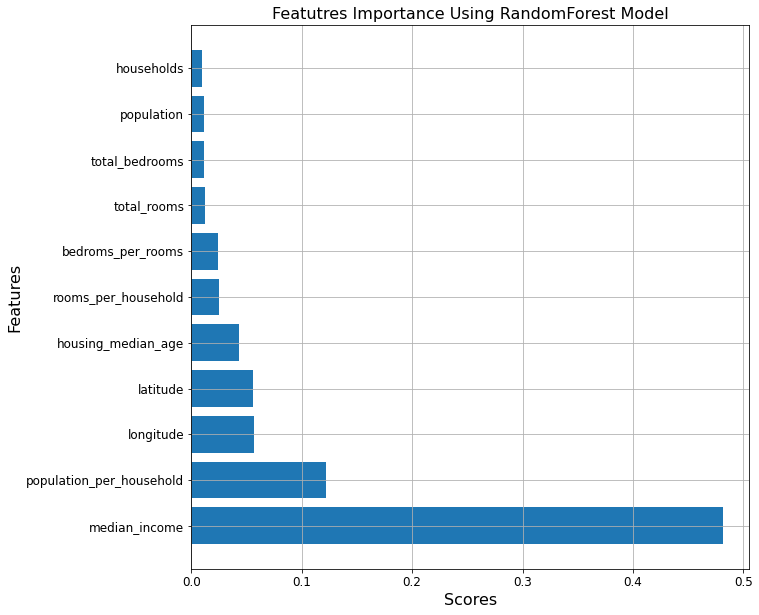

In [79]:
plt.figure(figsize=[10,10])
plt.barh(y=df_feat_import_forest['features'], width=df_feat_import_forest['score'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

feature importance from random forest is normalized

# XGBOOst

In [80]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [81]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}') 

RMSE Scores Using Tuned XGBoost --- [46401.218  48678.5008 48205.3615 46523.7734 48333.7256]
Mean of RMSE Scores Using XGBoost --- 47628.5158
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 47638.2574


# XGboost tuning

In [82]:
params_best_xgb = {'n_estimators':np.arange(100, 500, 50),
                      'max_depth': np.arange(4, 20, 2),
                      'learning_rate': [0.1, 0.2, 0.3],
                      'subsample': [0.7,0.8,0.9]
                     }
grid_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=params_best_xgb, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6)
grid_xgb.fit(X_train_final,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.9;, score=-2088031955.197 total time=   3.6s
[CV 2/5] END learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.9;, score=-2295507364.720 total time=   3.5s
[CV 3/5] END learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.9;, score=-2296897852.408 total time=   3.4s
[CV 4/5] END learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.9;, score=-2105298322.799 total time=   3.4s
[CV 5/5] END learning_rate=0.2, max_depth=8, n_estimators=300, subsample=0.9;, score=-2221355522.857 total time=   3.7s
[CV 1/5] END learning_rate=0.1, max_depth=18, n_estimators=300, subsample=0.9;, score=-2243456760.546 total time=   9.1s
[CV 2/5] END learning_rate=0.1, max_depth=18, n_estimators=300, subsample=0.9;, score=-2479051459.714 total time=   9.5s
[CV 3/5] END learning_rate=0.1, max_depth=18, n_estimators=300, subsample=0.9;, score=-254365304

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.1, max_bin=256,
                                          max_cat_t...
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='neg_mean_squared_error', verbose=6)

In [83]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'subsample': 0.7, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.1}
best_xgb --  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=350, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [84]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb 
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}') 

RMSE Scores Using Tuned Tuned XGBoost --- [44734.5018 46425.8151 46528.9118 45487.3579 46426.7681]
Mean of RMSE Scores Using Tuned XGBoost --- 45920.6710
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 45926.0339


#### Feature Importance using XGBoost¶
Feature Importance for tuned model of xgboost

Importance_types
‘weight’ - the number of times a feature is used to split the data across all trees. --> I used this Method

‘gain’ - the average gain across all splits the feature is used in.

‘cover’ - the average coverage across all splits the feature is used in.

‘total_gain’ - the total gain across all splits the feature is used in.

‘total_cover’ - the total coverage across all splits the feature is used in. 


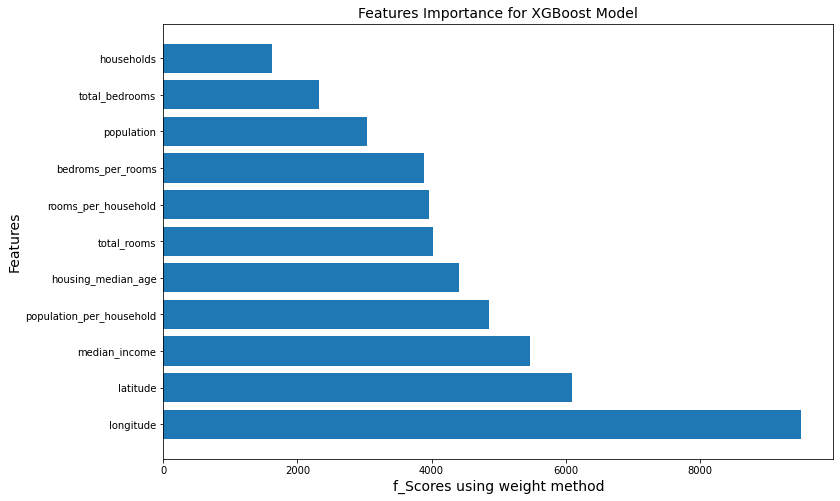

In [85]:
## Using XGBoost to get the Feature Importance
## get and sort 
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

## Only taking the first 11 Numerical Cols 
df_feat_import_xgb = df_feat_import_xgb[:len(num_cols)]   ## take only the first Numerical Cols

# ## Some Sort to plot
df_feat_import_xgb['Features'] = num_cols
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

# heading Regressor

In [87]:
voting_reg = VotingRegressor(estimators=[
                                        ('tuned_forest', best_forest), 
                                        ('tuned_xgb', best_xgb)
                                        ]
                            )

voting_reg.fit(X_train_final, y_train)  ## train
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_voting = cross_val_score(estimator=voting_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_voting = -1 * rmse_scores_voting   ## we want it positive
rmse_scores_voting = np.sqrt(rmse_scores_voting)
print(f'RMSE Scores Using VotingRegressor --- {np.round(rmse_scores_voting, 4)}')
print(f'Mean of RMSE Scores Using VotingRegressor --- {rmse_scores_voting.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_voting = cross_val_predict(estimator=voting_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_voting = np.sqrt(mean_squared_error(y_train, y_pred_voting))
print(f'RMSE after prediction Using VotingRegressor --- {rmse_pred_voting:.4f}')  ## almost the same result :D

RMSE Scores Using VotingRegressor --- [45427.6906 48138.5097 47653.5755 45889.3261 47107.8566]
Mean of RMSE Scores Using VotingRegressor --- 46843.3917
************************************************************************************************************************
RMSE after prediction Using VotingRegressor --- 46854.7288


# Model comparison

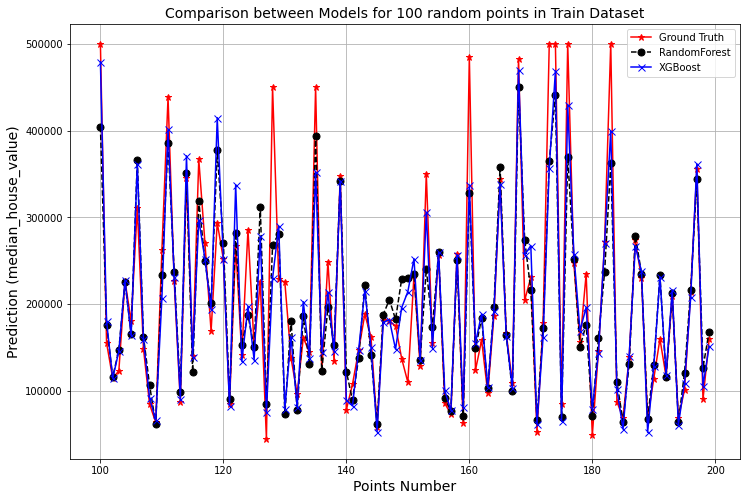

In [90]:
## Plotting
x_x = np.arange(100, 200)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(x_x, y_pred_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_tuned_xgb[100:200], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

if you plot y_train[100;200] without .values it will be wrong as we shuffled the train test split 

# download the best model

In [94]:
joblib.dump(best_xgb,'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [95]:
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=350, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### `Inference on Test Dataset`

In [98]:
y_pred_test = loaded_model.predict(X_test_final)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   

RMSE on test Dataset using XGBoost -- 44921.086
